In [1]:
from selenium import webdriver
import openpyxl
import pandas as pd
from selenium.webdriver.common.by import By
from time import time, sleep
import csv
from selenium.webdriver.common.action_chains import ActionChains

In [ ]:
driver = webdriver.Chrome()
r1 = []
c1 = []
driver.get('https://igchicago.org/information-portal/data-dashboards/complaints-notifications-lookup/')
sleep(5)

In [6]:
# Need names of police officers
wb=pd.read_excel("NYPD/Names.xlsx",usecols=['Name'])

In [7]:
def shot(driver, url, i):
    #driver1 = webdriver.Chrome()
    driver.get(url)
    # 截取整个页面
    #driver.get_screenshot_as_file("test.png")
    driver.save_screenshot("NYPD/image/%d.png" %i)
    driver.quit()

In [45]:
js = "window.scrollTo(0,1200);"
url = []
err = []
for i in range(0, 500):
    if check == 1:
        driver = webdriver.Chrome()
        driver.get('https://igchicago.org/information-portal/data-dashboards/complaints-notifications-lookup/')
        driver.execute_script(js)
        sleep(5)
        iframe_label = driver.find_elements(By.TAG_NAME, 'iframe')
        driver.switch_to.frame(iframe_label[0])
        #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
        a = driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0']/div/div[3]")
        while len(a) == 0:
            driver.refresh()
            driver.execute_script(js)
            sleep(5)
            iframe_label = driver.find_elements(By.TAG_NAME, 'iframe')
            driver.switch_to.frame(iframe_label[0])
            #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
            a = driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0']/div/div[3]")
            sleep(10)
        check = 0
    
    while len(a) == 0:
        driver.refresh()
        driver.execute_script(js)
        sleep(5)
        iframe_label = driver.find_elements(By.TAG_NAME, 'iframe')
        driver.switch_to.frame(iframe_label[0])
        #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
        a = driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0']/div/div[3]")
        sleep(2)
    
    try:
        a[0].click()
    except Exception as e:
        driver.quit()
        i -= 1
        check = 1
        #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
        continue
    sleep(1)
    driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].click()
    driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].send_keys(wb["Name"][i])
    sleep(2)
    b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))
    if len(b) == 0:
        j += 1
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))
    if len(b) == 0:
        j += 1
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))
    if len(b) == 0:
        j += 1
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))    
    if len(b) == 0:
        j -= 4
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))
    if len(b) == 0:
        err.append(i)
        driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].clear()
        driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].send_keys( wb["Name"][0])
        driver.implicitly_wait(10)
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_0']")
        b[0].click()
        sleep(2)
        continue
        
    b[0].click()
    
    sleep(4)
    d = driver.find_elements(By.XPATH, '//*[@id="tabZoneId22"]/div/div/div/div/div[5]/div[1]/img')
    if len(d) == 0:
        url.append('')
    else:
        check = 1
        sleep(3)
        d = driver.find_elements(By.XPATH, '//*[@id="tabZoneId22"]/div/div/div/div/div[5]/div[1]/img')
        url.append(d[0].get_attribute('src'))
        driver.implicitly_wait(10)
        shot(driver, d[0].get_attribute('src'), i)
        #print(d[0].get_attribute('src'))
    #sleep(2)

Random test on missing data

In [47]:
import random

In [49]:
# The sample size is 22728
for i in range(100):
    j = random.randint(0,len(wb))  
    r2.append(j)
print(r2)

[7263, 12703, 5914, 14060, 12031, 5475, 18681, 21875, 14289, 21503, 20296, 14740, 10227, 11651, 18998, 3228, 18708, 16131, 12694, 19213, 9043, 7593, 13941, 15166, 1914, 14114, 636, 5297, 17624, 343, 21029, 13602, 11735, 7299, 18375, 21926, 1904, 20643, 829, 152, 11935, 17470, 4888, 13271, 609, 15232, 17315, 16853, 11361, 20923, 2513, 18050, 407, 45, 16559, 15760, 15357, 6164, 19029, 5788, 3701, 10269, 15711, 1312, 784, 10595, 18125, 11152, 18355, 800, 20302, 14831, 9913, 11848, 21140, 3224, 10158, 9755, 8306, 8264, 15811, 16559, 10874, 7383, 3034, 15988, 2609, 7870, 7913, 7542, 7335, 10105, 13791, 15498, 19104, 16583, 15963, 19463, 10971, 10204]


In [55]:
check = 0
t = []
err1 = []
for i in r2:
    if check == 1:
        driver = webdriver.Chrome()
        driver.get('https://igchicago.org/information-portal/data-dashboards/complaints-notifications-lookup/')
        driver.execute_script(js)
        sleep(5)
        iframe_label = driver.find_elements(By.TAG_NAME, 'iframe')
        driver.switch_to.frame(iframe_label[0])
        #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
        a = driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0']/div/div[3]")
        while len(a) == 0:
            driver.refresh()
            driver.execute_script(js)
            sleep(5)
            iframe_label = driver.find_elements(By.TAG_NAME, 'iframe')
            driver.switch_to.frame(iframe_label[0])
            #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
            a = driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0']/div/div[3]")
            sleep(10)
        check = 0
    
    while len(a) == 0:
        driver.refresh()
        driver.execute_script(js)
        sleep(5)
        iframe_label = driver.find_elements(By.TAG_NAME, 'iframe')
        driver.switch_to.frame(iframe_label[0])
        #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
        a = driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0']/div/div[3]")
        sleep(2)
    
    try:
        a[0].click()
    except Exception as e:
        driver.quit()
        i -= 1
        check = 1
        #a = driver.find_elements(By.CLASS_NAME, "tabComboBoxButton")
        continue
    sleep(1)
    driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].click()
    driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].send_keys(wb["Name"][i])
    sleep(2)
    b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))
    j = 0
    while len(b) == 0 and j <= 200:
        j += 1
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_%d']" %(i+j))

    if len(b) == 0:
        err1.append(i)
        driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].clear()
        driver.find_elements(By.XPATH, "//*[@id='tableau_base_widget_LegacyCategoricalQuickFilter_0_textbox']")[0].send_keys( wb["Name"][0])
        driver.implicitly_wait(10)
        b = driver.find_elements(By.XPATH, "//*[@id='SI_federated.1hjkt4g0xt6x57163ogs91f8cbmk,none:filter_name_sql2:nk4355296241306101410_6831366894405232224_0']")
        b[0].click()
        sleep(2)
        continue
        
    b[0].click()
    
    sleep(4)
    d = driver.find_elements(By.XPATH, '//*[@id="tabZoneId22"]/div/div/div/div/div[5]/div[1]/img')
    if len(d) == 0:
        url.append('')
    else:
        check = 1
        sleep(3)
        d = driver.find_elements(By.XPATH, '//*[@id="tabZoneId22"]/div/div/div/div/div[5]/div[1]/img')
        t.append(i)
        driver.quit()
        #url.append(d[0].get_attribute('src'))
        #driver.implicitly_wait(10)
        #shot(driver, d[0].get_attribute('src'), i)
        #print(d[0].get_attribute('src'))
    #sleep(2)

KeyboardInterrupt: 

In [57]:
err1

[45]

Trend and comparison with New York police

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\25280\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Anaconda3\lib\

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io

AttributeError: _ARRAY_API not found

In [3]:
ch = pd.read_csv("NYPD/24-07-10 Chi_records.csv", header = 0)
#ch = pd.read_csv("NYPD/Final_nopending.csv", header = 0)
ny = pd.read_csv("NYPD/24-06-08 NY_records.csv", header = 0)

In [4]:
ch

,taxid,year,total_allegation,total_subs,race,gender,before_subs_2018,state,White,Black,Hispanic,Two or More Race,Null,Asian,Male,before_subs_2021
0,AARON JEFFERY M star 596,2007,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
1,AARON JEFFERY M star 596,2008,1,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
2,AARON JEFFERY M star 596,2009,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
3,AARON JEFFERY M star 596,2010,1,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
4,AARON JEFFERY M star 596,2011,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384127,ZYRKOWSKI CARLO E star 19215,2019,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
384128,ZYRKOWSKI CARLO E star 19215,2020,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
384129,ZYRKOWSKI CARLO E star 19215,2021,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0
384130,ZYRKOWSKI CARLO E star 19215,2022,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,0


In [5]:
ny

,taxid,year,total_allegation,total_subs,race_fill,gender_fill,before_subs_2018,before_subs_2021,state
0,848658,2018,0,0,White,Male,0,0,NYPD
1,848658,2019,0,0,White,Male,0,0,NYPD
2,848658,2020,0,0,White,Male,0,0,NYPD
3,848658,2021,0,0,White,Male,0,0,NYPD
4,848658,2022,0,0,White,Male,0,0,NYPD
...,...,...,...,...,...,...,...,...,...
242671,977545,2019,0,0,Hispanic,Male,0,0,NYPD
242672,977545,2020,0,0,Hispanic,Male,0,0,NYPD
242673,977545,2021,0,0,Hispanic,Male,0,0,NYPD
242674,977545,2022,0,0,Hispanic,Male,0,0,NYPD


In [6]:
df1 = ch[ch["year"] >= 2018]

In [7]:
df2 = ny[ny["year"] >= 2018]

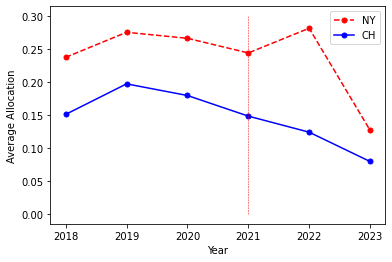

In [9]:
b1 = df1.groupby("year")["total_allegation"].sum()/(len(df1)/6)
b2 = df2.groupby("year")["total_allegation"].sum()/(len(df2)/6)
plt.xlabel("Year")
plt.ylabel("Average Allocation")
plt.plot(b2, label = "NY", color = "red", linestyle = "--", marker = ".", markersize = 10)
plt.plot(b1, label = "CH", color = "blue", marker = ".", markersize = 10)
plt.vlines([2021],0,0.3, linestyles='dashed', colors='red', linewidth = 0.5)
plt.legend()
plt.savefig('C:/Users/25280/Downloads/NYPD/24-07-11_tot_allegation_pattern.png',dpi=600) 

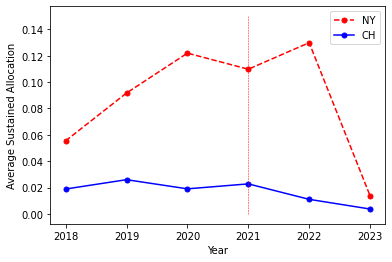

In [10]:
c1 = df1.groupby("year")["total_subs"].sum()/(len(df1)/6)
c2 = df2.groupby("year")["total_subs"].sum()/(len(df2)/6)
plt.xlabel("Year")
plt.ylabel("Average Sustained Allocation")
plt.plot(c2, label = "NY", color = "red", linestyle = "--", marker = ".", markersize = 10)
plt.plot(c1, label = "CH", color = "blue", marker = ".", markersize = 10)
plt.vlines([2021],0,0.15, linestyles='dashed', colors='red', linewidth = 0.5)
plt.legend()
plt.savefig('C:/Users/25280/Downloads/NYPD/24-07-11_subs_allegation_pattern.png',dpi=600) 

In [11]:
df3 = ch[ch["year"] >= 2018]
df4 = ny[ny["year"] >= 2018]
df5 = df3[df3["before_subs_2021"] > 0]
df6 = df4[df4["before_subs_2021"] > 0]

In [12]:
df5.to_csv("C:/Users/25280/Downloads/NYPD/Chi_sus.csv")
df6.to_csv("C:/Users/25280/Downloads/NYPD/Ny_sus.csv")

In [13]:
df5

,taxid,year,total_allegation,total_subs,race,gender,before_subs_2018,state,White,Black,Hispanic,Two or More Race,Null,Asian,Male,before_subs_2021
181,ABDELHADI ABDALMAHD star 7147,2018,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,1
182,ABDELHADI ABDALMAHD star 7147,2019,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,1
183,ABDELHADI ABDALMAHD star 7147,2020,1,1,White,Male,0,Chicago,1,0,0,0,0,0,1,1
184,ABDELHADI ABDALMAHD star 7147,2021,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,1
185,ABDELHADI ABDALMAHD star 7147,2022,0,0,White,Male,0,Chicago,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382835,ZIA KEVIN M star 7234,2019,1,1,White,Male,0,Chicago,1,0,0,0,0,0,1,2
382836,ZIA KEVIN M star 7234,2020,2,1,White,Male,0,Chicago,1,0,0,0,0,0,1,2
382837,ZIA KEVIN M star 7234,2021,1,0,White,Male,0,Chicago,1,0,0,0,0,0,1,2
382838,ZIA KEVIN M star 7234,2022,3,0,White,Male,0,Chicago,1,0,0,0,0,0,1,2


In [14]:
df6

,taxid,year,total_allegation,total_subs,race_fill,gender_fill,before_subs_2018,before_subs_2021,state
18,850291,2018,0,0,White,Male,2,2,NYPD
19,850291,2019,0,0,White,Male,2,2,NYPD
20,850291,2020,0,0,White,Male,2,2,NYPD
21,850291,2021,0,0,White,Male,2,2,NYPD
22,850291,2022,0,0,White,Male,2,2,NYPD
...,...,...,...,...,...,...,...,...,...
234853,969349,2019,0,0,Hispanic,Male,0,1,NYPD
234854,969349,2020,1,1,Hispanic,Male,0,1,NYPD
234855,969349,2021,0,0,Hispanic,Male,0,1,NYPD
234856,969349,2022,0,0,Hispanic,Male,0,1,NYPD


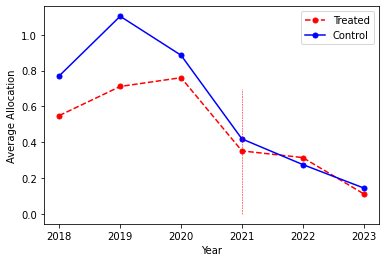

In [15]:
b1 = df5.groupby("year")["total_allegation"].sum()/(len(df5)/6)
b2 = df6.groupby("year")["total_allegation"].sum()/(len(df6)/6)
plt.xlabel("Year")
plt.ylabel("Average Allocation")
plt.plot(b2, label = "Treated", color = "red", linestyle = "--", marker = ".", markersize = 10)
plt.plot(b1, label = "Control", color = "blue", marker = ".", markersize = 10)
plt.vlines([2021],0,0.7, linestyles='dashed', colors='red', linewidth = 0.5)
plt.legend()
plt.savefig('C:/Users/25280/Downloads/NYPD/24-07-11_tot_allegation_before2021_pattern.png',dpi=600) 

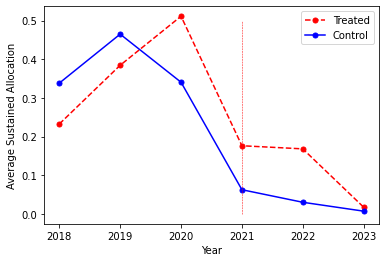

In [16]:
c1 = df5.groupby("year")["total_subs"].sum()/(len(df5)/6)
c2 = df6.groupby("year")["total_subs"].sum()/(len(df6)/6)
plt.xlabel("Year")
plt.ylabel("Average Sustained Allocation")
plt.plot(c2, label = "Treated", color = "red", linestyle = "--", marker = ".", markersize = 10)
plt.plot(c1, label = "Control", color = "blue", marker = ".", markersize = 10)
plt.vlines([2021],0,0.5, linestyles='dashed', colors='red', linewidth = 0.5)
plt.legend()
plt.savefig('C:/Users/25280/Downloads/NYPD/24-07-11_subs_allegation_before2021_pattern.png',dpi=600) 